<a href="https://colab.research.google.com/github/Ritika2910/Salary-Forecasting-with-Machine-learning/blob/main/SALARY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:

1. **Age**
2. **Gender**
3. **Education Level**
4. **Job Title**
5. **Years of Experience**
6. **Salary**

First we pre-process, clean and model the data to standarsise and structure it.


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Importing Data

df = pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
# Checking for null data

df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
# Dropping null values from database

df.dropna(inplace=True)

In [ ]:
# Checking unique value counts of Job Titles in the database

df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


In [ ]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [ ]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [ ]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [ ]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's,3021
Master's,1860
PhD,1369
High School,448


In [ ]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013
Other,14


<h1>Exploratory Data Analysis<h1>

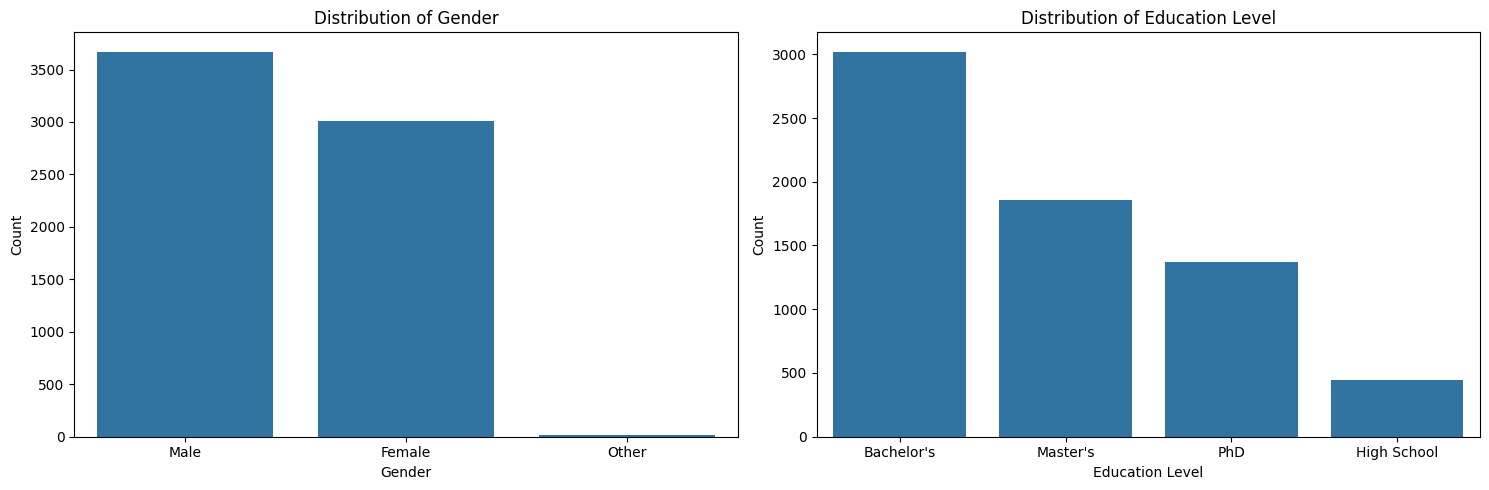

In [ ]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**
    
1. **Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.
    
2. **Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.


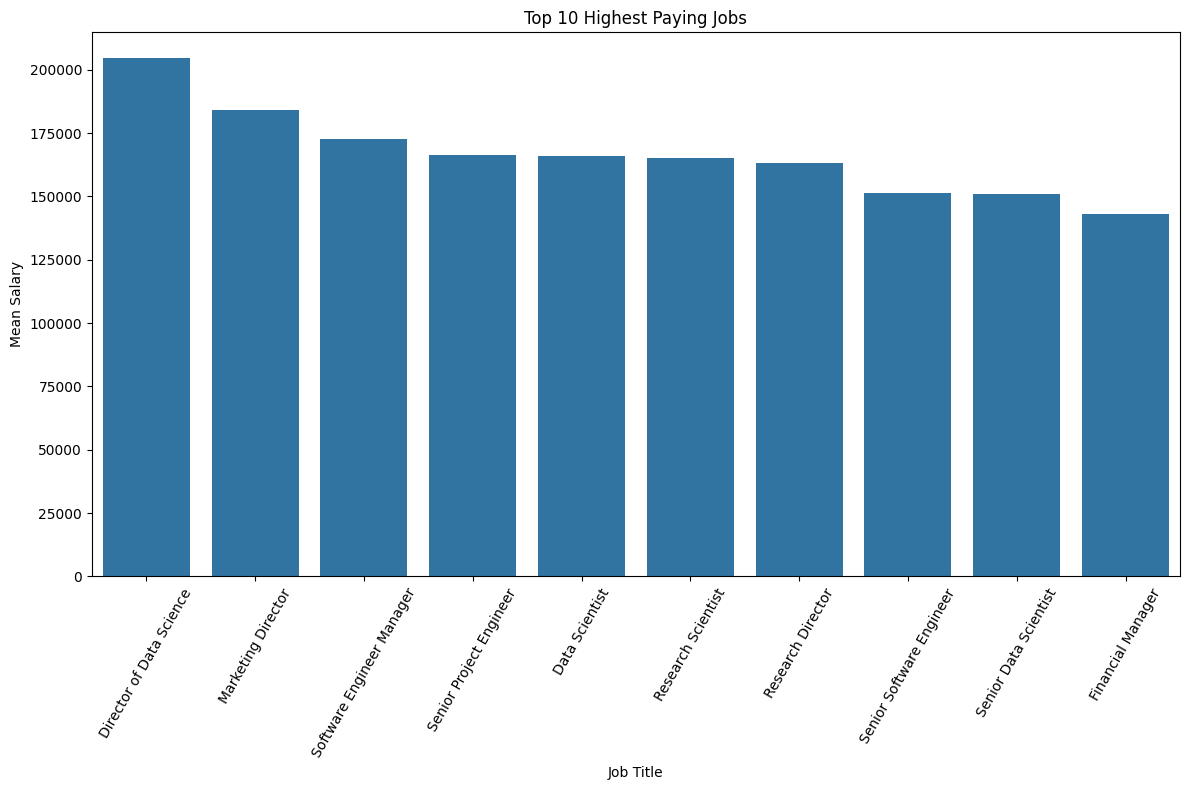

In [ ]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


**Top 10 Highest Paying Jobs**
    
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

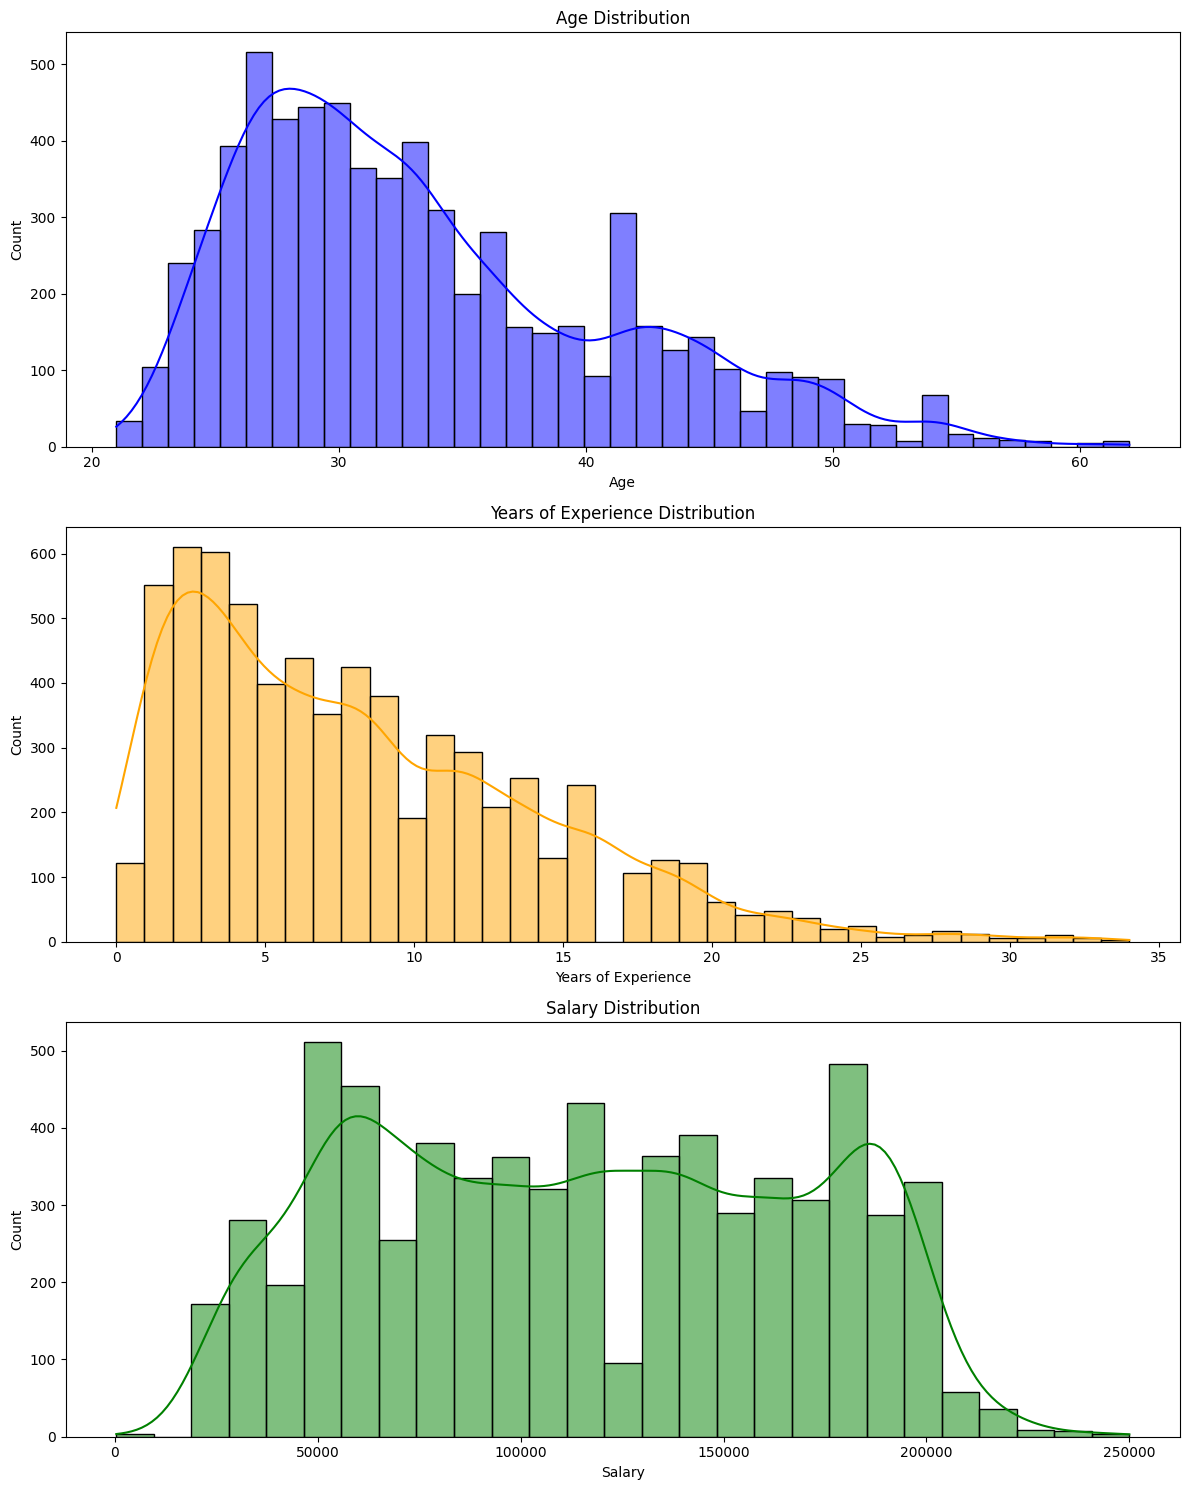

In [ ]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of continuous variables**
    
1. **Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.
    
2. **Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts
    
3. **Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.


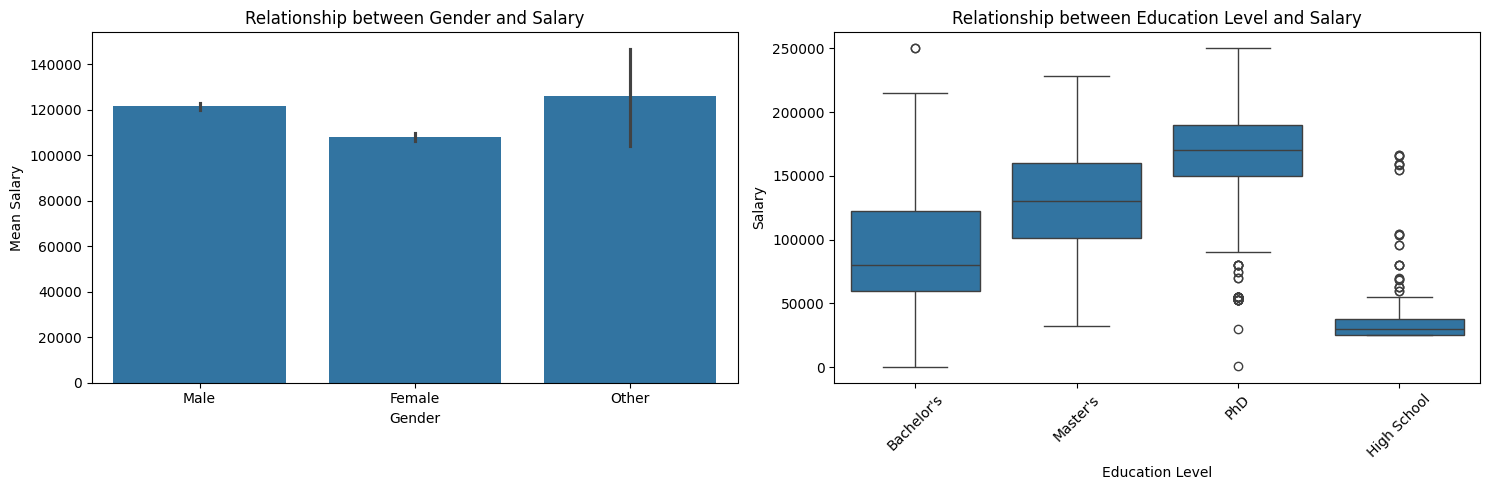

In [ ]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between discreet variables**
    
1. **Gender and Salary:** Other genders earn more than men and women. Women earn the least out of all three genders.
    
2. **Education Level and Salary:** The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.
    

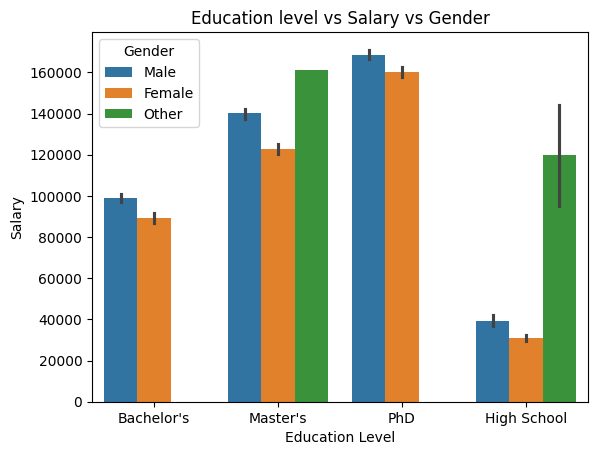

In [ ]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

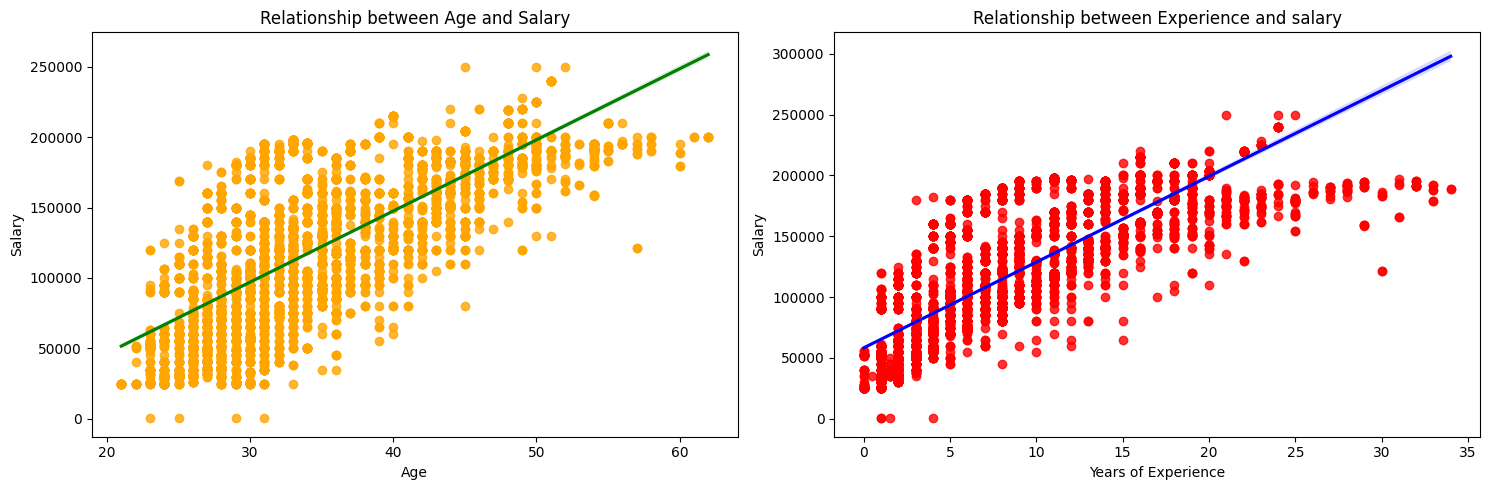

In [ ]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

2. **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.


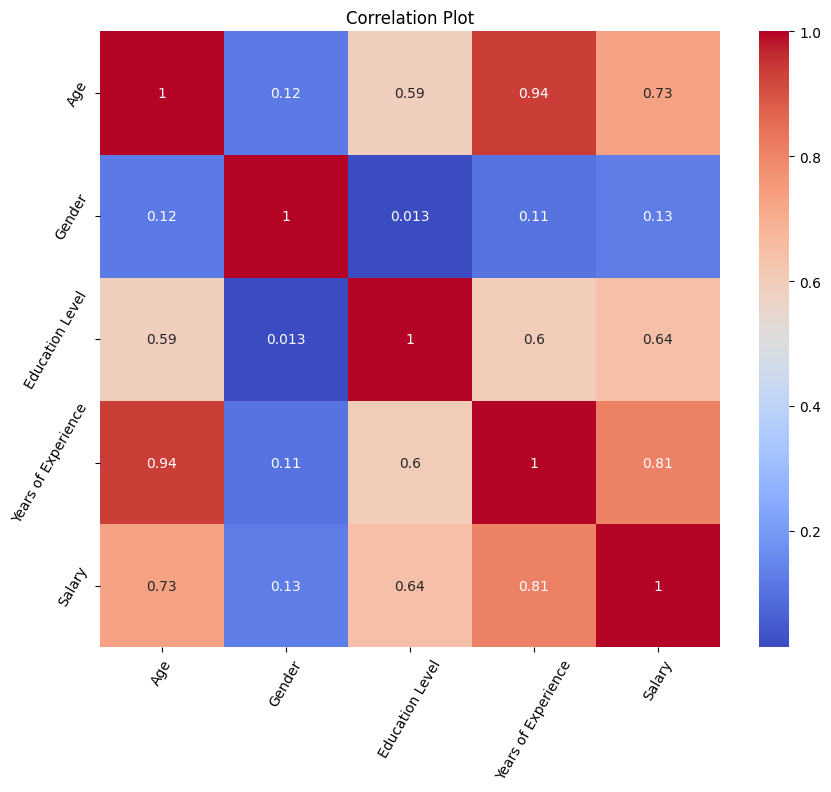

In [ ]:
# Mapping Education Level column
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)

# Label encoding the categorical variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
# Calculate correlation only for numeric columns by setting numeric_only=True
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Use cmap for color map
plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

**Heatmap**

The heatmap reveals the degree of correlation between the variables

1. Highest correlation between age and years of experience
2. High correlation between salary and years of experience
3. High correlation between salary and age
4. Moderately high correlation between salary and education level
5. Low correlation between gender and all variables


**Predicting Salary**

3 Models will be used to predict the salary

1. Linear Regression
2. Deision Tree
3. Random Forest

In [ ]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [ ]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [ ]:
df[df.Salary<lower]

SyntaxError: invalid syntax (<ipython-input-57-0ed75adfdefe>, line 1)

\\**No outliers in Q1**

<h2>Preparing the data for ML analysis by converting categorical job titles into a numerical format<h2>

In [ ]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

In [ ]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [ ]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

In [ ]:
# Create a dictionary for defining models and tuning hyperparameters
from sklearn.linear_model import Ridge, Lasso # Import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor  # Import other models
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor

model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    'Lasso': {  # Added Lasso Regression
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }

    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'Decision_Tree': {  # Added Decision Tree Regression
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 20, 30, 50, 80],
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

In [ ]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    # Impute NaN values with the mean of each column in x_train
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    x_train_imputed = imputer.fit_transform(x_train)

    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    # Fit the model using the imputed data
    clf.fit(x_train_imputed,y_train)

    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.642012e+08
1,Ridge,{'alpha': 0.1},-4.641823e+08
2,Lasso,{'alpha': 1},-4.641980e+08
3,GradientBoosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-8.991127e+07
4,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 50}",-5.440060e+08
5,Decision_Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-1.509440e+08
6,Random_Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-1.150966e+08


In [ ]:
# Order of the best models

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
3,GradientBoosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-8.991127e+07
6,Random_Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-1.150966e+08
5,Decision_Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-1.509440e+08
1,Ridge,{'alpha': 0.1},-4.641823e+08
2,Lasso,{'alpha': 1},-4.641980e+08
0,Linear_Regression,{},-4.642012e+08
4,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 50}",-5.440060e+08


In [ ]:
# Impute NaN values with the mean of each column in x_train before fitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test) # Also impute x_test for consistency

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming x_train, x_test, y_train, y_test are already defined and imputed

# Dictionary of models and their parameters
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=0),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha =  0.1 ),
    'Lasso': Lasso(alpha = 0.1),
    'AdaBoost': AdaBoostRegressor(learning_rate=0.1,n_estimators=100),
    'Random Forest': RandomForestRegressor(max_depth=10, min_samples_split=2, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=20)  # Added for completeness
}

# Iterate through models, fit, predict, and calculate errors
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    model.fit(x_train, y_train)  # Fit the model
    y_pred = model.predict(x_test)  # Make predictions

    # Calculate and print error metrics
    score = model.score(x_test, y_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R-squared Score: {score}")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("\n")

--- Decision Tree ---
R-squared Score: 0.9412718508060915
Mean Squared Error: 167450277.6499436
Mean Absolute Error: 7646.740239931774
Root Mean Squared Error: 12940.258020995701


--- Linear Regression ---
R-squared Score: 0.8329414604682001
Mean Squared Error: 476330332.4276322
Mean Absolute Error: 15753.355437075003
Root Mean Squared Error: 21824.99329731013


--- Ridge ---
R-squared Score: 0.8329087390530154
Mean Squared Error: 476423630.2776916
Mean Absolute Error: 15753.681411693598
Root Mean Squared Error: 21827.13060110494


--- Lasso ---
R-squared Score: 0.8329347310776268
Mean Squared Error: 476349519.79068315
Mean Absolute Error: 15753.396620500422
Root Mean Squared Error: 21825.432866055216


--- AdaBoost ---
R-squared Score: 0.8046456339346446
Mean Squared Error: 557009599.0895885
Mean Absolute Error: 19390.224842103915
Root Mean Squared Error: 23601.05080477538


--- Random Forest ---
R-squared Score: 0.9540387934430918
Mean Squared Error: 131048175.44427177
Mean Absolute

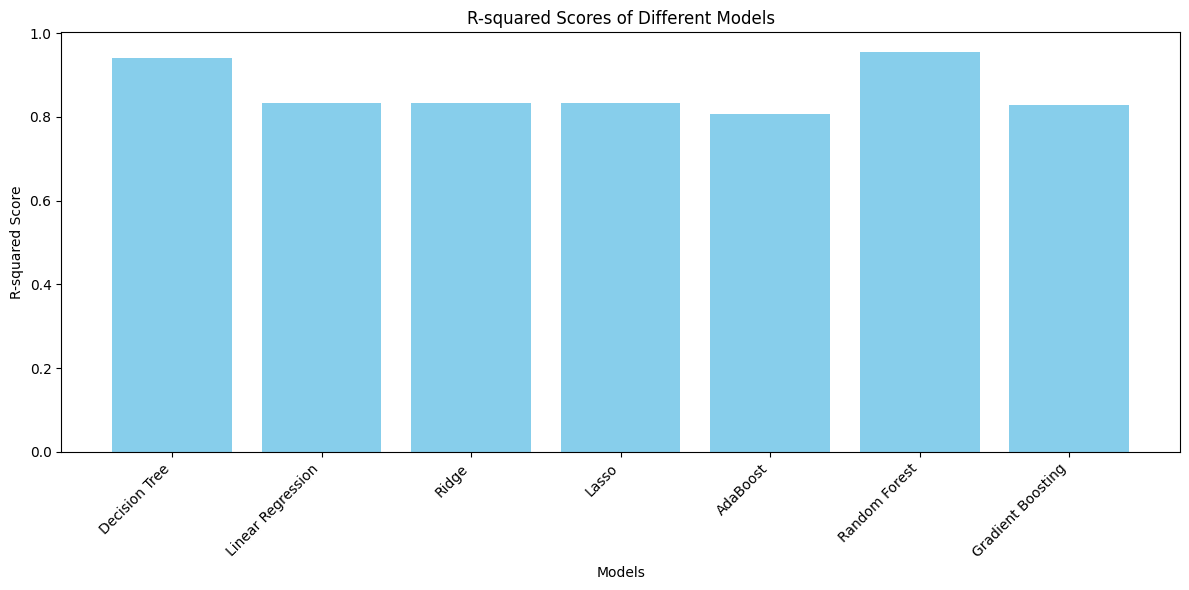

In [ ]:
# Create bar chart
model_names = list(models.keys())
r2_scores = []  # Create an empty list to store R-squared scores

# Calculate and store R-squared scores
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Fit the model
    y_pred = model.predict(x_test)  # Make predictions
    score = model.score(x_test, y_test)  # Get R-squared score
    r2_scores.append(score)  # Append score to the list

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()